Project Question: By using Chronic Kidney Disease data gathered from 5 different hospitals in India create a prediction model which would be able to predict if a person is likely to have developed a chronic kidney disease (CKD) 

Information about the data: <br>
    ○ 25 number of values (including class/label) <br>
    ○ 400 number of instances <br>
    ○ There are missing values <br>
    ○ Data was made public in 2015 <br>
    ○ Link to data source: http://archive.ics.uci.edu/dataset/336/chronic+kidney+disease <br>

What is chronic kidney disease?
It is one of several kidney diseases that results a gradual loss of kidney functionality which could lead in death.
According to the statistics there were around 323 millions of people in the entire world which were affected by one or another form of this disease (source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5055577/). 

Why this kind of project would be necessary and valuable?
Chronic kidney disease is a growing problem world-wide and therefore it is important to bring some more attention to it. CKD is comprised of 5 different stages and there are ways that the progression of kidney failure could be slowed down or stopped. Therefore it is very important to be able to discover people which are likely to have developed CKD as soon as possible.  

This project could be able to contribute to early discovering of patients who have developed CKD by looking in a number (24 in total) of factors which are said to be helpful while trying to indicate if a person has actually developed CKD.

Project delimitations: <br>
    ○ Data collected only from 1 country <br>
    ○ Relatively small (400) amount of instances <br>

## Imports

In [1]:
import pandas as pd
import numpy as np
# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## Reading data

In [2]:
# Reading data table and assigning names for columns
readData = pd.read_table('chronic_kidney_disease_cleaned.arff', ',', header=None,
                         names=["age", "bloodPressure","specificGravity","albumin","sugar","redBloodCells","pusCell","pusCellClumps",
                                "bacteria", "bloodGlucoseRandom","bloodUrea","serumCreatinine","sodium",
                                "potassium","hemoglobin","packedCellVolume","whiteBloodCellCount",
                                "redBloodCellCount","hypertension","diabetesMellitus","coronaryArteryDisease",
                                "appetite","pedalEdema","anemia","class" ])
data = pd.DataFrame(readData);
# Number of collumns and rows
print("Rows and Columns", data.shape)

#Showing 10 first rows
data.head(10)

Rows and Columns (400, 25)


C:\Users\abhis\AppData\Local\Temp\ipykernel_11936\1941044188.py:2: FutureWarning: In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only.
  readData = pd.read_table('chronic_kidney_disease_cleaned.arff', ',', header=None,


,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


## Data processing

### Checking for missing data

In [4]:
# Replacing missing ("?") and ("\t?") data with NaN values
data = data.replace('?', np.NaN)
data = data.replace('\t?', np.NaN)

# Visualizing changed values
data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
#Checking where is missing data by each column
# As it could be seen there is a lot of missing data in the table
missing = data.isnull().sum(axis=0) 
print("Columns and Number of missing data \n", missing)

Columns and Number of missing data 
 age                        9
bloodPressure             12
specificGravity           47
albumin                   46
sugar                     49
redBloodCells            152
pusCell                   65
pusCellClumps              4
bacteria                   4
bloodGlucoseRandom        44
bloodUrea                 19
serumCreatinine           17
sodium                    87
potassium                 88
hemoglobin                52
packedCellVolume          71
whiteBloodCellCount      106
redBloodCellCount        131
hypertension               2
diabetesMellitus           2
coronaryArteryDisease      2
appetite                   1
pedalEdema                 1
anemia                     1
class                      0
dtype: int64


## Replacing nominal (text) values into numerical values

Replacing nominal (text) values with numerical values is important since otherwise we will not be able to work with most of the algorithms

In [6]:
# Making a map where 'normal' will be converted into 1 and 'abnormal' will be converted into 0
redBloodCells_mapping = {'normal' : 1, 'abnormal' : 0}
# Making the actual convertion and replacing the values in the table
data['redBloodCells'] = data['redBloodCells'].map(redBloodCells_mapping)

# Making a map where 'normal' will be converted into 1 and 'abnormal' will be converted into 0
pusCell_mapping = {'normal' : 1, 'abnormal' : 0}
# Making the actual convertion and replacing the values in the table
data['pusCell'] = data['pusCell'].map(pusCell_mapping)

# Making a map where 'present' will be converted into 1 and 'notpresent' will be converted into 0
pusCellClumps_mapping = {'present' : 1, 'notpresent' : 0}
# Making the actual convertion and replacing the values in the table
data['pusCellClumps'] = data['pusCellClumps'].map(pusCellClumps_mapping)

# Making a map where 'present' will be converted into 1 and 'notpresent' will be converted into 0
bacteria_mapping = {'present' : 1, 'notpresent' : 0}
# Making the actual convertion and replacing the values in the table
data['bacteria'] = data['bacteria'].map(bacteria_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
hypertension_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['hypertension'] = data['hypertension'].map(hypertension_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
diabetesMellitus_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['diabetesMellitus'] = data['diabetesMellitus'].map(diabetesMellitus_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
coronaryArteryDisease_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['coronaryArteryDisease'] = data['coronaryArteryDisease'].map(coronaryArteryDisease_mapping)

# Making a map where 'good' will be converted into 1 and 'poor' will be converted into 0
appetite_mapping = {'good' : 1, 'poor' : 0}
# Making the actual convertion and replacing the values in the table
data['appetite'] = data['appetite'].map(appetite_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
pedalEdema_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['pedalEdema'] = data['pedalEdema'].map(pedalEdema_mapping)

# Making a map where 'yes' will be converted into 1 and 'no' will be converted into 0
anemia_mapping = {'yes' : 1, 'no' : 0}
# Making the actual convertion and replacing the values in the table
data['anemia'] = data['anemia'].map(anemia_mapping)


# Here, working with mapping of the class label
# Making a map where 'ckd' will be converted into 1 and 'notckd' will be converted into 0
class_mapping = {'ckd' : 1, 'notckd' : 0}
# Making the actual convertion and replacing the values in the table
data['class'] = data['class'].map(class_mapping)

In [7]:
data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,NaN,1.0,0.0,0.0,121,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7,50,1.020,4,0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62,80,1.010,2,3,1.0,1.0,0.0,0.0,423,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48,70,1.005,4,0,1.0,0.0,1.0,0.0,117,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51,80,1.010,2,0,1.0,1.0,0.0,0.0,106,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60,90,1.015,3,0,NaN,NaN,0.0,0.0,74,...,39,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68,70,1.010,0,0,NaN,1.0,0.0,0.0,100,...,36,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24,NaN,1.015,2,4,1.0,0.0,0.0,0.0,410,...,44,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52,100,1.015,3,0,1.0,0.0,1.0,0.0,138,...,33,9600,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53,90,1.020,2,0,0.0,0.0,1.0,0.0,70,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


## Replacing missing data

Our strategy with missing data:
When there are some missing data in the table there could be couple of approaches how this problem could be solved. The easiest way could be to just remove those collumns that have an extensive amount of missing data. Even though we have a relatively high amount of data that is missing there are no collumns where the amount of missing data is higher then 90%. Therefore, we have chosen to find ways how to replace this data instead of removing it.

In [8]:
# Replace empty 'age' values by their columns average
data['age'] = data.age.astype(float)
data['age'].fillna((data['age'].mean()), inplace=True)
data['age'] = data.age.astype(int)

# Replace empty 'bloodPressure' values by their columns average
data['bloodPressure'] = data.bloodPressure.astype(float)
data['bloodPressure'].fillna((data['bloodPressure'].mean()), inplace=True)
data['bloodPressure'] = data.bloodPressure.astype(int)

#Replace empty 'specificGravity' values with most frequent value in the collumn
data['specificGravity'] = data['specificGravity'].fillna(data['specificGravity'].value_counts().index[0])
data['specificGravity'] = data.specificGravity.astype(float)

#Replace empty 'albumin' values with most frequent value in the collumn
data['albumin'] = data['albumin'].fillna(data['albumin'].value_counts().index[0])
data['albumin'] = data.albumin.astype(int)

#Replace empty 'sugar' values with most frequent value in the collumn
data['sugar'] = data['sugar'].fillna(data['sugar'].value_counts().index[0])
data['sugar'] = data.sugar.astype(int)

#Replace empty 'redBloodCells' values with most frequent value in the collumn
data['redBloodCells'] = data['redBloodCells'].fillna(data['redBloodCells'].value_counts().index[0])
data['redBloodCells'] = data.redBloodCells.astype(int)

#Replace empty 'pusCell' values with most frequent value in the collumn
data['pusCell'] = data['pusCell'].fillna(data['pusCell'].value_counts().index[0])
data['pusCell'] = data.pusCell.astype(int)

#Replace empty 'pusCellClumps' values with most frequent value in the collumn
data['pusCellClumps'] = data['pusCellClumps'].fillna(data['pusCellClumps'].value_counts().index[0])
data['pusCellClumps'] = data.pusCellClumps.astype(int)

#Replace empty 'bacteria' values with most frequent value in the collumn
data['bacteria'] = data['bacteria'].fillna(data['bacteria'].value_counts().index[0])
data['bacteria'] = data.bacteria.astype(int)

#Replace empty 'bloodGlucoseRandom' values with most frequent value in the collumn
data['bloodGlucoseRandom'] = data['bloodGlucoseRandom'].fillna(data['bloodGlucoseRandom'].value_counts().index[0])
data['bloodGlucoseRandom'] = data.bloodGlucoseRandom.astype(int)

# Replace empty 'bloodUrea' values by their columns average
data['bloodUrea'] = data.bloodUrea.astype(float)
data['bloodUrea'].fillna((data['bloodUrea'].mean()), inplace=True)
data['bloodUrea'] = data.bloodUrea.astype(int)

# Replace empty 'serumCreatinine' values by their columns average
data['serumCreatinine'] = data.serumCreatinine.astype(float)
data['serumCreatinine'].fillna((data['serumCreatinine'].mean()), inplace=True)
data['serumCreatinine'] = data.serumCreatinine.astype(int)

# Replace empty 'sodium' values by their columns average
data['sodium'] = data.sodium.astype(float)
data['sodium'].fillna((data['sodium'].mean()), inplace=True)
data['sodium'] = data.sodium.astype(int)

# Replace empty 'potassium' values by their columns average
data['potassium'] = data.potassium.astype(float)
data['potassium'].fillna((data['potassium'].mean()), inplace=True)
data['potassium'] = data.potassium.astype(int)

# Replace empty 'hemoglobin' values by their columns average
data['hemoglobin'] = data.hemoglobin.astype(float)
data['hemoglobin'].fillna((data['hemoglobin'].mean()), inplace=True)
data['hemoglobin'] = data.hemoglobin.astype(int)

# Replace empty 'packedCellVolume' values by their columns average
data['packedCellVolume'] = data.packedCellVolume.astype(float)
data['packedCellVolume'].fillna((data['packedCellVolume'].mean()), inplace=True)
data['packedCellVolume'] = data.packedCellVolume.astype(int)

# Replace empty 'whiteBloodCellCount' values by their columns average
data['whiteBloodCellCount'] = data.whiteBloodCellCount.astype(float)
data['whiteBloodCellCount'].fillna((data['whiteBloodCellCount'].mean()), inplace=True)
data['whiteBloodCellCount'] = data.whiteBloodCellCount.astype(int)

# Replace empty 'redBloodCellCount' values by their columns average
data['redBloodCellCount'] = data.redBloodCellCount.astype(float)
data['redBloodCellCount'].fillna((data['redBloodCellCount'].mean()), inplace=True)
data['redBloodCellCount'] = data.redBloodCellCount.astype(int)

#Replace empty 'hypertension' values with most frequent value in the collumn
data['hypertension'] = data['hypertension'].fillna(data['hypertension'].value_counts().index[0])
data['hypertension'] = data.hypertension.astype(int)

#Replace empty 'diabetesMellitus' values with most frequent value in the collumn
data['diabetesMellitus'] = data['diabetesMellitus'].fillna(data['diabetesMellitus'].value_counts().index[0])
data['diabetesMellitus'] = data.diabetesMellitus.astype(int)

#Replace empty 'coronaryArteryDisease' values with most frequent value in the collumn
data['coronaryArteryDisease'] = data['coronaryArteryDisease'].fillna(data['coronaryArteryDisease'].value_counts().index[0])
data['coronaryArteryDisease'] = data.coronaryArteryDisease.astype(int)

#Replace empty 'appetite' values with most frequent value in the collumn
data['appetite'] = data['appetite'].fillna(data['appetite'].value_counts().index[0])
data['appetite'] = data.appetite.astype(int)

#Replace empty 'pedalEdema' values with most frequent value in the collumn
data['pedalEdema'] = data['pedalEdema'].fillna(data['pedalEdema'].value_counts().index[0])
data['pedalEdema'] = data.pedalEdema.astype(int)

#Replace empty 'anemia' values with most frequent value in the collumn
data['anemia'] = data['anemia'].fillna(data['anemia'].value_counts().index[0])
data['anemia'] = data.anemia.astype(int)

data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5,1,1,0,1,0,0,1.0
1,7,50,1.020,4,0,1,1,0,0,99,...,38,6000,4,0,0,0,1,0,0,1.0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4,0,1,0,0,0,1,1.0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3,1,0,0,0,1,1,1.0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4,0,0,0,1,0,0,1.0
5,60,90,1.015,3,0,1,1,0,0,74,...,39,7800,4,1,1,0,1,1,0,1.0
6,68,70,1.010,0,0,1,1,0,0,100,...,36,8406,4,0,0,0,1,0,0,1.0
7,24,76,1.015,2,4,1,0,0,0,410,...,44,6900,5,0,1,0,1,1,0,1.0
8,52,100,1.015,3,0,1,0,1,0,138,...,33,9600,4,1,1,0,1,0,1,1.0
9,53,90,1.020,2,0,0,0,1,0,70,...,29,12100,3,1,1,0,0,0,1,1.0


## Distribution of attributes

In this section we will visualize distribution of various attributes that are part of our data table. In this way we will be able to better understand with what kind of data we are working with and already see where could we find some possible candidates for outliers.

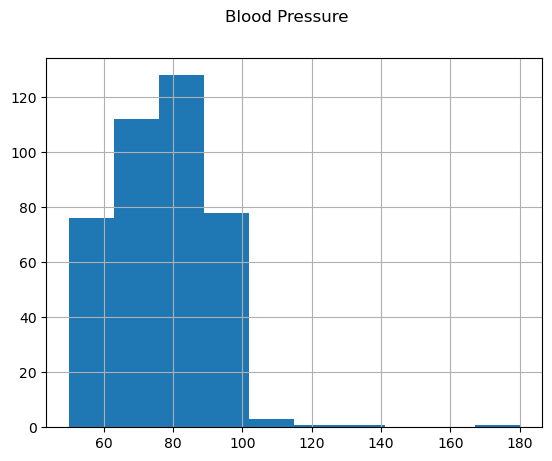

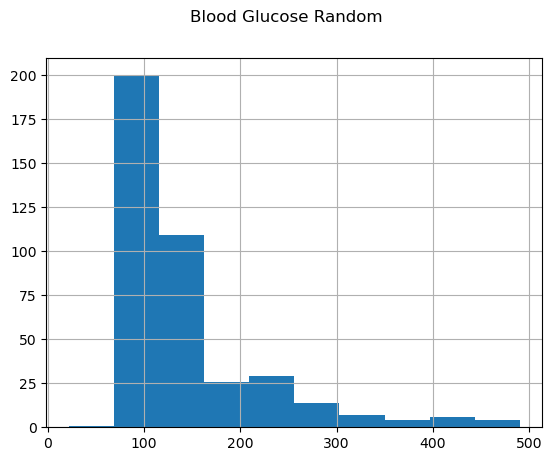

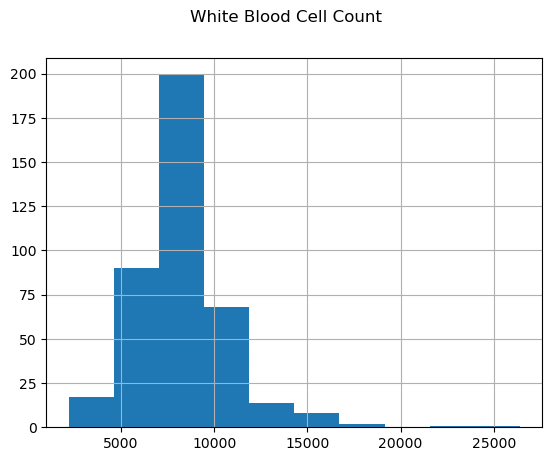

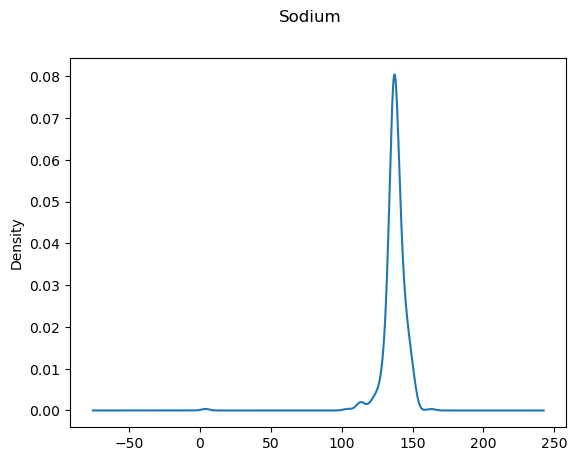

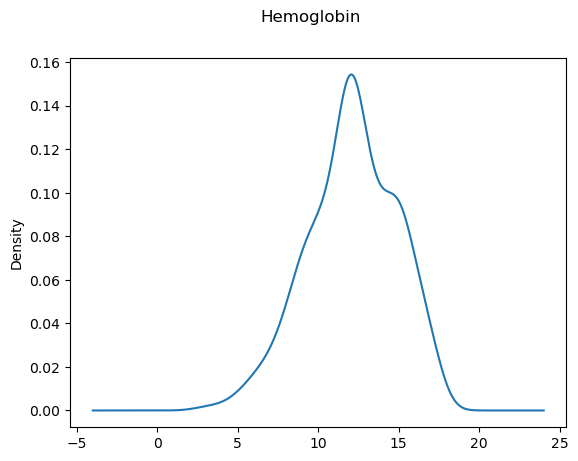

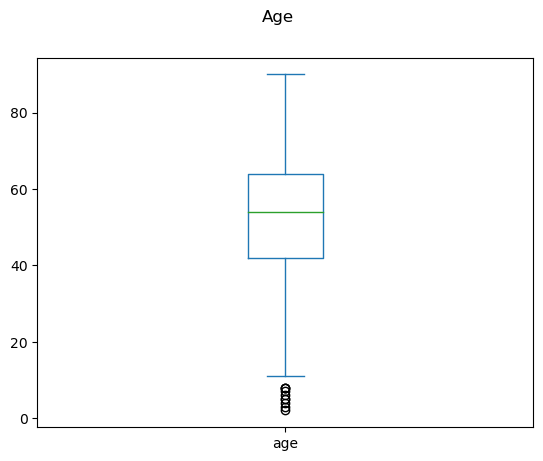

In [9]:

data["bloodPressure"].hist(grid=True)
plt.suptitle("Blood Pressure")
plt.show()

data["bloodGlucoseRandom"].hist(grid=True)
plt.suptitle("Blood Glucose Random")
plt.show()

data["whiteBloodCellCount"].hist(grid=True)
plt.suptitle("White Blood Cell Count")
plt.show()

data["sodium"].plot(kind='density', subplots=True, sharex=False)
plt.suptitle("Sodium")
plt.show()

data["hemoglobin"].plot(kind='density', subplots=True, sharex=False)
plt.suptitle("Hemoglobin")
plt.show()

data["age"].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.suptitle("Age")
plt.show()

## Outliers

In this section we are checking for outliers which are the data values that are far away from the average value inside a column. The outliers are found with a help of the average of the column values and also using standard deviation. <br>
While working with this part I had to look into what kind of values or their differences are considered to be "normal". Therefore variation of inputs in some of the lines is different. After closer inspection I found out that such attributes like "Blood Glucose Random" may vary a lot in the real life therefore this kind of variation not necessarily mean errors in collecting the data <br>
The "Age" attribute is not being checked for possible outliers, because those values that are very different from the average value of this column are also most likely not a mistake. 

In [9]:

# Cheking for outliers in the "bloodPressure" column, keep only the ones that are within +3 to -3 standard deviations in column
data["bloodPressure"] = data["bloodPressure"][abs(data["bloodPressure"] - np.mean(data["bloodPressure"])) < 3 * np.std(data["bloodPressure"])]

# Cheking for outliers in the "bloodGlucoseRandom" column
data["bloodGlucoseRandom"] = data["bloodGlucoseRandom"][abs(data["bloodGlucoseRandom"] - np.mean(data["bloodGlucoseRandom"])) < 4 * np.std(data["bloodGlucoseRandom"])]

# Cheking for outliers in the "bloodUrea" column
data["bloodUrea"] = data["bloodUrea"][abs(data["bloodUrea"] - np.mean(data["bloodUrea"])) < 3 * np.std(data["bloodUrea"])]

# Cheking for outliers in the "serumCreatinine" column
data["serumCreatinine"] = data["serumCreatinine"][abs(data["serumCreatinine"] - np.mean(data["serumCreatinine"])) < 3 * np.std(data["serumCreatinine"])]

# Cheking for outliers in the "sodium" column
data["sodium"] = data["sodium"][abs(data["sodium"] - np.mean(data["sodium"])) < 4 * np.std(data["sodium"])]

# Cheking for outliers in the "potassium" column
data["potassium"] = data["potassium"][abs(data["potassium"] - np.mean(data["potassium"])) < 3 * np.std(data["potassium"])]

# Cheking for outliers in the "hemoglobin" column
data["hemoglobin"] = data["hemoglobin"][abs(data["hemoglobin"] - np.mean(data["hemoglobin"])) < 3 * np.std(data["hemoglobin"])]

# Cheking for outliers in the "packedCellVolume" column
data["packedCellVolume"] = data["packedCellVolume"][abs(data["packedCellVolume"] - np.mean(data["packedCellVolume"])) < 3 * np.std(data["packedCellVolume"])]

# Cheking for outliers in the "whiteBloodCellCount" column
data["whiteBloodCellCount"] = data["whiteBloodCellCount"][abs(data["whiteBloodCellCount"] - np.mean(data["whiteBloodCellCount"])) < 3 * np.std(data["whiteBloodCellCount"])]

# Cheking for outliers in the "redBloodCellCount" column
data["redBloodCellCount"] = data["redBloodCellCount"][abs(data["redBloodCellCount"] - np.mean(data["redBloodCellCount"])) < 3 * np.std(data["redBloodCellCount"])]

#print(data["redBloodCellCount"])

missing = data.isnull().sum(axis=0) 
print("Columns and Number of missing data \n", missing)

#print(data["class"])

data.head(10)


Columns and Number of missing data 
 age                       0
bloodPressure             3
specificGravity           0
albumin                   0
sugar                     0
redBloodCells             0
pusCell                   0
pusCellClumps             0
bacteria                  0
bloodGlucoseRandom        3
bloodUrea                10
serumCreatinine           4
sodium                    1
potassium                 2
hemoglobin                1
packedCellVolume          2
whiteBloodCellCount       6
redBloodCellCount         1
hypertension              0
diabetesMellitus          0
coronaryArteryDisease     0
appetite                  0
pedalEdema                0
anemia                    0
class                     2
dtype: int64


,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80.0,1.020,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.0,1,1,0,1,0,0,1.0
1,7,50.0,1.020,4,0,1,1,0,0,99.0,...,38.0,6000.0,4.0,0,0,0,1,0,0,1.0
2,62,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,4.0,0,1,0,0,0,1,1.0
3,48,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.0,1,0,0,0,1,1,1.0
4,51,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.0,0,0,0,1,0,0,1.0
5,60,90.0,1.015,3,0,1,1,0,0,74.0,...,39.0,7800.0,4.0,1,1,0,1,1,0,1.0
6,68,70.0,1.010,0,0,1,1,0,0,100.0,...,36.0,8406.0,4.0,0,0,0,1,0,0,1.0
7,24,76.0,1.015,2,4,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,1,1,0,1.0
8,52,100.0,1.015,3,0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,1,0,1,1.0
9,53,90.0,1.020,2,0,0,0,1,0,70.0,...,29.0,12100.0,3.0,1,1,0,0,0,1,1.0


In [10]:
# Here we are removing all the rows which have missing data which was removed when we were looking for the outliers.
data.dropna(inplace=True)
# Here we are re-setting the indexes of the table
data.reset_index(drop=True, inplace=True)
data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48,80.0,1.020,1,0,1,1,0,0,121.0,...,44.0,7800.0,5.0,1,1,0,1,0,0,1.0
1,7,50.0,1.020,4,0,1,1,0,0,99.0,...,38.0,6000.0,4.0,0,0,0,1,0,0,1.0
2,62,80.0,1.010,2,3,1,1,0,0,423.0,...,31.0,7500.0,4.0,0,1,0,0,0,1,1.0
3,48,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.0,1,0,0,0,1,1,1.0
4,51,80.0,1.010,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.0,0,0,0,1,0,0,1.0
5,60,90.0,1.015,3,0,1,1,0,0,74.0,...,39.0,7800.0,4.0,1,1,0,1,1,0,1.0
6,24,76.0,1.015,2,4,1,0,0,0,410.0,...,44.0,6900.0,5.0,0,1,0,1,1,0,1.0
7,52,100.0,1.015,3,0,1,0,1,0,138.0,...,33.0,9600.0,4.0,1,1,0,1,0,1,1.0
8,53,90.0,1.020,2,0,0,0,1,0,70.0,...,29.0,12100.0,3.0,1,1,0,0,0,1,1.0
9,63,70.0,1.010,3,0,0,0,1,0,380.0,...,32.0,4500.0,3.0,1,1,0,0,1,0,1.0


## Correlation

In this part we are going to check if there are any correlating columns and will visualize it. <br>
Correlating columns are the ones which: <br>
○ Provide the same information, but just in different formats <br>
○ Are not very useful, because they do not provide that much of an information <br>
○ Could potentially confuse algorithm that we are using

Showing the correlation matrix using matplotlib.pyplot library <br>
The yeallow color means that columns are highly correlated while the blue ones mean that they are not correlated. As we can see from the matrix there are no higly correlated columns in our data table, therefore no columns are necessary to be removed. P.S. In our case the yellow spots in the table represents the same columns

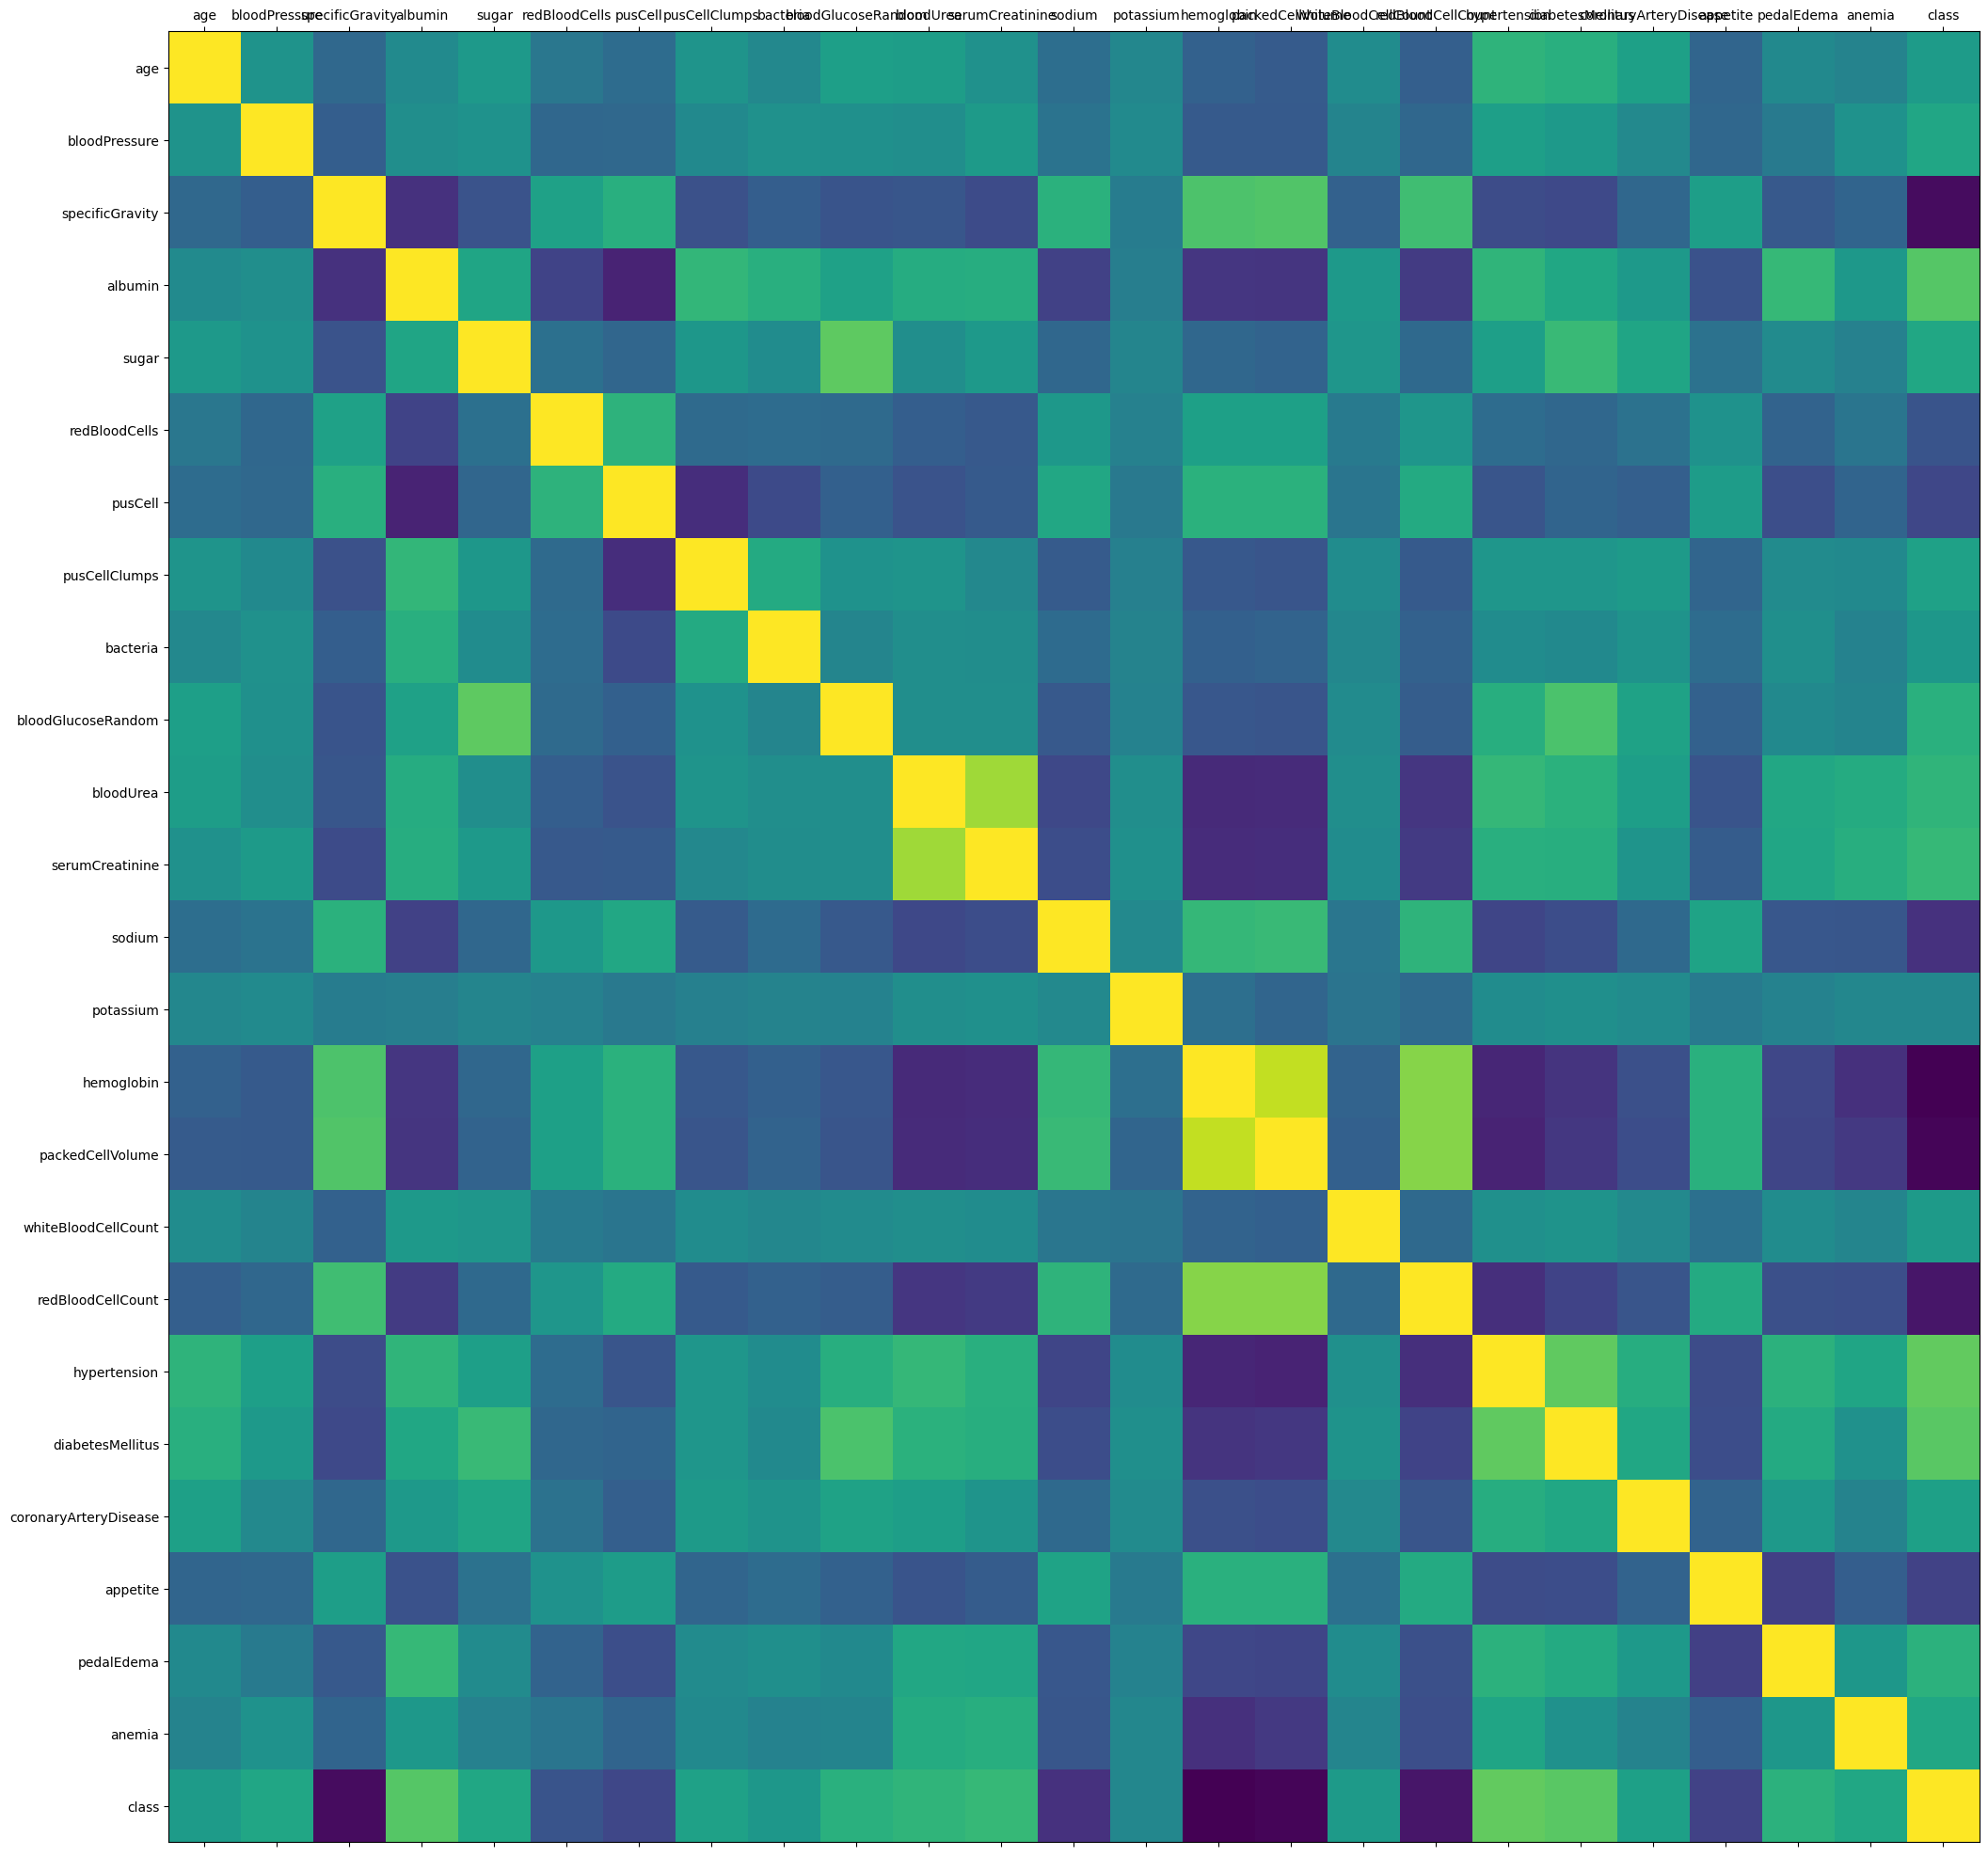

In [11]:
# Compute the correlation matrix
corr = data.corr()
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25, 25))
#matplotlib to show correlation matrix
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


## Data pre-processing

In this part we will try to apply some common techniques 

### Scaling

In [12]:
# Scaling all the columns with the numeric values.
# When your data is comprised of attributes with varying scales,many machine learning algorithms can benefit 
# from rescaling the attributes to all have the same scale. Often this is referred to as normalization and attributes 
# are often rescaled into the range between 0 and 1. 
# This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. 
# Useful for algorithms that weight inputs like regression and neural networks and algorithms 
# that use distance measures like K-Nearest Neighbors.

scaler = MinMaxScaler(feature_range=(0, 1))

data[['age','bloodPressure','bloodGlucoseRandom','bloodUrea','serumCreatinine',
      'sodium','potassium','hemoglobin','packedCellVolume','whiteBloodCellCount',
      'redBloodCellCount']] = scaler.fit_transform(data[['age','bloodPressure','bloodGlucoseRandom',
                                                         'bloodUrea','serumCreatinine','sodium','potassium',
                                                         'hemoglobin','packedCellVolume','whiteBloodCellCount',
                                                         'redBloodCellCount']])
data.head(10)

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCell,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,0.522727,0.500000,1.020,1,0,1,1,0,0,0.232941,...,0.736842,0.414815,0.75,1,1,0,1,0,0,1.0
1,0.056818,0.000000,1.020,4,0,1,1,0,0,0.181176,...,0.578947,0.281481,0.50,0,0,0,1,0,0,1.0
2,0.681818,0.500000,1.010,2,3,1,1,0,0,0.943529,...,0.394737,0.392593,0.50,0,1,0,0,0,1,1.0
3,0.522727,0.333333,1.005,4,0,1,0,1,0,0.223529,...,0.421053,0.333333,0.25,1,0,0,0,1,1,1.0
4,0.556818,0.500000,1.010,2,0,1,1,0,0,0.197647,...,0.500000,0.377778,0.50,0,0,0,1,0,0,1.0
5,0.659091,0.666667,1.015,3,0,1,1,0,0,0.122353,...,0.605263,0.414815,0.50,1,1,0,1,1,0,1.0
6,0.250000,0.433333,1.015,2,4,1,0,0,0,0.912941,...,0.736842,0.348148,0.75,0,1,0,1,1,0,1.0
7,0.568182,0.833333,1.015,3,0,1,0,1,0,0.272941,...,0.447368,0.548148,0.50,1,1,0,1,0,1,1.0
8,0.579545,0.666667,1.020,2,0,0,0,1,0,0.112941,...,0.342105,0.733333,0.25,1,1,0,0,0,1,1.0
9,0.693182,0.333333,1.010,3,0,0,0,1,0,0.842353,...,0.421053,0.170370,0.25,1,1,0,0,1,0,1.0


In this section we will analyze which columns have biggers influence on the label and which ones are less important therefore could be possible candidates in removing them.

We started calculating the importance of the columns with a <strong>ExtraTreesClassifier()</strong> method which weights every attribute (column). In this case, <strong>the higher the number, the more important a column is for the result.</strong> As it could be seen in the results, there are two particular columns which are absolutely not important for the result and those are "Bacteria" and "Coronary Artery Disease"  Therefore, I have chosen to remove them. There are also some columns that have a relatively low impact on the result ("Sugar", "Potassium"), however, we have decided that we will leave them for now.

Feature ranking:
1. feature 2 (0.148530)
2. feature 18 (0.126354)
3. feature 19 (0.124522)
4. feature 3 (0.102778)
5. feature 14 (0.095023)
6. feature 15 (0.081298)
7. feature 17 (0.057364)
8. feature 21 (0.047613)
9. feature 6 (0.029614)
10. feature 22 (0.026918)
11. feature 11 (0.024281)
12. feature 12 (0.022735)
13. feature 1 (0.020087)
14. feature 9 (0.018766)
15. feature 10 (0.016079)
16. feature 23 (0.014994)
17. feature 4 (0.009167)
18. feature 5 (0.007748)
19. feature 0 (0.007118)
20. feature 7 (0.007008)
21. feature 16 (0.005981)
22. feature 13 (0.002918)
23. feature 8 (0.002036)
24. feature 20 (0.001067)


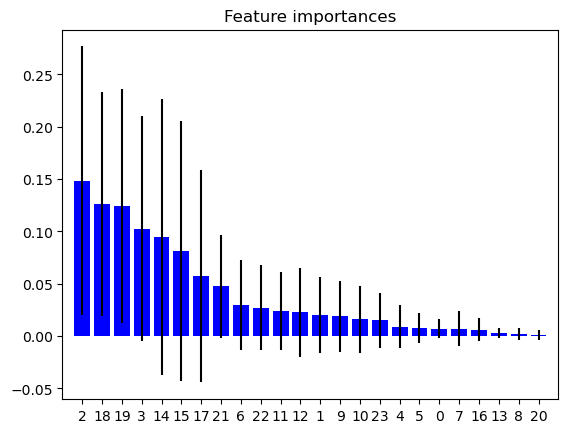

In [13]:
#print (data.dtypes)
array = data.values
X = array[:,0:24]
Y = array[:,24]
#use of forests of trees to evaluate the importance of features on an artificial classification task
model = ExtraTreesClassifier()
model.fit(X, Y)
#print(model.feature_importances_)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



## Feature Importance

## Removing not important columns

In this part we are removing those columns which are less important for the actual result. At the start we have decided to leave only 10 most valuable columns, but this might change since we will try investigate how choosing different columns is affecting accuracy of the model.

In [14]:
# Removing less important columns
del data['pusCellClumps']
del data['whiteBloodCellCount']
del data['potassium']
del data['bacteria']
del data['coronaryArteryDisease']
del data['age']
del data['sugar']
del data['bloodUrea']
del data['sodium']
del data['bloodPressure']
del data['bloodGlucoseRandom']
del data['redBloodCells']
del data['serumCreatinine']
del data['anemia']


In [15]:
data.shape
data.head(20)

,specificGravity,albumin,pusCell,hemoglobin,packedCellVolume,redBloodCellCount,hypertension,diabetesMellitus,appetite,pedalEdema,class
0,1.020,1,1,0.833333,0.736842,0.75,1,1,1,0,1.0
1,1.020,4,1,0.500000,0.578947,0.50,0,0,1,0,1.0
2,1.010,2,1,0.333333,0.394737,0.50,0,1,0,0,1.0
3,1.005,4,0,0.500000,0.421053,0.25,1,0,0,1,1.0
4,1.010,2,1,0.500000,0.500000,0.50,0,0,1,0,1.0
5,1.015,3,1,0.583333,0.605263,0.50,1,1,1,1,1.0
6,1.015,2,0,0.583333,0.736842,0.75,0,1,1,1,1.0
7,1.015,3,0,0.416667,0.447368,0.50,1,1,1,0,1.0
8,1.020,2,0,0.333333,0.342105,0.25,1,1,0,0,1.0
9,1.010,3,0,0.416667,0.421053,0.25,1,1,0,1,1.0


In [16]:
#Save data in a file
data.to_csv('Data_chronic_kidney_disease_6_6.csv',sep='\t')

## Check class distribution

Here we are cheking how many people who participated in the research have Chronic Kidney Disease and how  many of them do not have it. It is important information to know, since if there is a huge disproportion then it could negatively affect the accuracy of our models. <br>
<br>
After making calculations we can see that there is no big disproportion in our data as little bit more then 59% of the people have CKD and around 40% do not have it.

In [17]:
num_obs = len(data)#Find number of rows
num_true = len(data.loc[data['class'] == 1.0])#Number of people who have the disease
num_false = len(data.loc[data['class'] == 0.0])#Number of people who do not have the disease
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  221 (59.57%)
Number of False cases: 150 (40.43%)


## Split the data

At this part of the project we will be spliting the data into two main sets: data for model training and data for testing of the models.> At the start we will follow the most common strategy of doing it by spliting the data into <strong>70% for the training and 30% for the testing.</strong>

In [18]:
#scikit learn contains train_test_split method to split data into training set and testing set
from sklearn.model_selection  import train_test_split

feature_col_names = ["specificGravity","albumin","pusCell","hemoglobin","packedCellVolume",
                                "redBloodCellCount","hypertension","diabetesMellitus",
                                "appetite","pedalEdema"]
predicted_class_names = ['class']
#Split data into two data frames
X = data[feature_col_names].values     # predictor feature columns (10 X m)
y = data[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
# test_size = 0.3 is 30%
split_test_size = 0.3
#Setting seed constant random_state=5 ensure that if we run function again, the split will be identical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=5) 

We check to ensure we have the the desired 70% train, 30% test split of the data

In [19]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data.index)) * 100))

69.81% in training set
30.19% in test set


Here we are checking the distribution between people with CKD and without CKD among training data and testing data

In [20]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data.loc[data['class'] == 1]), (len(data.loc[data['class'] == 1])/len(data.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data.loc[data['class'] == 0]), (len(data.loc[data['class'] == 0])/len(data.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 221 (59.57%)
Original False : 150 (40.43%)

Training True  : 158 (61.00%)
Training False : 101 (39.00%)

Test True      : 63 (56.25%)
Test False     : 49 (43.75%)


# Training models of supervised learning

## Random Forest

Random Forest is an ensemble algorithm. It is based on decision trees. It created multiple trees, hence the forest part of the name with random subsets of the training data. The results of these trees are averaged. This usually results in improved performance and can reduce the tree algorithm's tendencies to overfit.

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

<strong>Predict on Training Data</strong>

In [22]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9961


<strong>Predicting on Testing Data</strong>

In [23]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 1.0000


In [24]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[49  0]
 [ 0 63]]

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        49
         1.0       1.00      1.00      1.00        63

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



## Model Validation

In this chapter I am using data from "the outside" in order to check if model can really predict if a person has a CKD condition or that he/she does not have it.

In [25]:
# Reading data table and assigning names for columns
readDataGenerated = pd.read_table('chronic_kidney_disease_generated.arff', ',', header=None,
                         names=["specificGravity","albumin","pusCell","hemoglobin","packedCellVolume",
                                "redBloodCellCount","hypertension","diabetesMellitus",
                                "appetite","pedalEdema"])
dataGenerated = pd.DataFrame(readDataGenerated);
# Number of collumns and rows
print("Rows and Columns", dataGenerated.shape)
dataGenerated.head(10)

Rows and Columns (20, 10)


C:\Users\abhis\AppData\Local\Temp\ipykernel_13832\1820460994.py:2: FutureWarning: In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only.
  readDataGenerated = pd.read_table('chronic_kidney_disease_generated.arff', ',', header=None,


,specificGravity,albumin,pusCell,hemoglobin,packedCellVolume,redBloodCellCount,hypertension,diabetesMellitus,appetite,pedalEdema
0,1.015,1,1,0.845234,0.783493,0.70,1,0,1,0
1,1.025,3,0,0.464646,0.343434,0.50,0,1,1,1
2,1.005,2,1,0.344343,0.533535,0.40,0,1,1,0
3,1.010,1,1,0.545434,0.353535,0.30,0,1,0,0
4,1.010,4,0,0.534132,0.242424,0.50,0,1,1,0
5,1.020,6,1,0.431232,0.544554,0.50,0,0,0,1
6,1.025,5,1,0.542343,0.566556,0.75,0,0,1,0
7,1.015,3,0,0.433423,0.747447,0.35,1,0,1,0
8,1.020,2,1,0.545434,0.757557,0.45,1,0,0,1
9,1.010,1,1,0.434343,0.655656,0.55,1,1,1,1


## Testing Random Forest model on generated data

In [26]:
# Here we validate that the model trained gives the same results on the dataset tested(which returns correct class label)
print(rf_model.predict([[1.025,0,1,0.916667,1.000000,1.00,0,0,1,0]]))
print(rf_model.predict([[1.01,2,1,0.5,0.5,0.5,0,0,1,0]]))
# As you see bellow, our model can predict(using unknown data) the class based on previous training
print(rf_model.predict([[1.010,4,0,0.534132,0.242424,0.50,0,1,1,0]]))
print(rf_model.predict([[1.035,4,1,0.755757,0.767676,0.50,0,0,1,1]]))
print(rf_model.predict([[1.020,2,1,0.878787,0.656565,0.35,1,1,1,0]]))


[0.]
[1.]
[1.]
[1.]
[1.]


## Conclusion

We have tried to predict if an individual has Chronic Kidney Disease based on data gathered form 5 different hospitals located in India.
This dataset had 400 instances with different labels including a class which indicated if the individual had CKD. 

Performed a lot of data cleaning activities including replacing missing values with values based on an algorithm chosen by us. We decided to remove less important columns from the dataset therefore in the end we based our predictions on 10 columns. We trained and tested our model and we have gotten very good prediction rates with best of them reaching 97%.

In conclusion we got the desired result and therefore totaly fulfilled our goal which was set before the start of this project. It could also be added that our work group was very happy about the results, since we have managed to achieve such high accuracies.

Learned various techniques in both preparing the data and using it for training various other models.

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier()
model.fit(X,y)
predictions = model.predict(X)
#print("Accuracy : %s" % "{0:.3%}".format(accuracy))
c=float(input("enter Specific gravity in nominal"))
d=int(input("enter Albumin in nominal(1-5)"))
g=int(input("enter Pus Cell(1-normal,0-abnormal)"))
o=float(input("enter Haemoglobin"))
p=float(input("enter Packed Cell Volume"))
r=float(input("enter Red Blood Cell count"))
s=int(input("enter Hypertension"))
e=int(input("enter Diabetes-mellitus in nominal"))
t=int(input("enter Appetite"))
u=int(input("enter Pedal Edema"))
ex=np.array([[c],[d],[g],[o],[p],[r],[s],[e],[t],[u],])
#ex.shape
ex = ex.reshape(1,len(ex))
prediction = model.predict(ex)
print(prediction)
if prediction==1:
    print("ckd is positive")
else:
    print("ckd is negative")
accuracy = metrics.accuracy_score(predictions,y)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

C:\Users\abhis\AppData\Local\Temp\ipykernel_13832\2070949006.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


enter Specific gravity in nominal 1.025
enter Albumin in nominal(1-5) 1
enter Pus Cell(1-normal,0-abnormal) 1
enter Haemoglobin .9166
enter Packed Cell Volume 1.00
enter Red Blood Cell count 1.00
enter Hypertension 0
enter Diabetes-mellitus in nominal 0
enter Appetite 1
enter Pedal Edema 0


[0.]
ckd is negative
Accuracy : 99.730%
